<a href="https://colab.research.google.com/github/HarshalaShisave/mydatascience2021/blob/main/4assignment_1question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
dataset=pd.read_csv('/content/delivery_time.csv')
dataset

**EDA and Data Visualization**

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 504.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


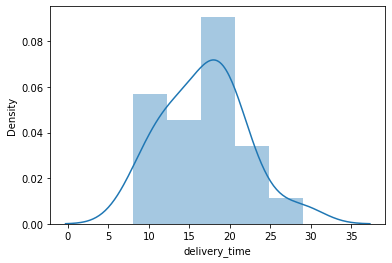

In [51]:
sns.distplot(dataset['delivery_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


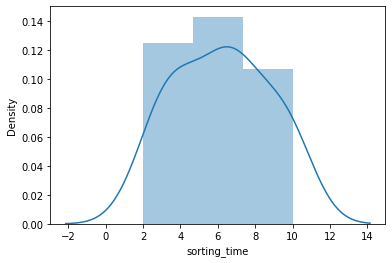

In [50]:
sns.distplot(dataset['sorting_time'])

**Feature Engineering**

In [ ]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

**Correlation Analysis**

In [ ]:
dataset.corr()

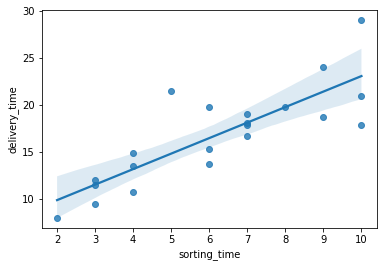

In [52]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

**Model Building**

In [53]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

**Model Testing**

In [55]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [54]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [56]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

**Model Predictions**

In [57]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [58]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [59]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [46]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64